In [108]:
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np

In [109]:
filename = 'data1.mat'
data = loadmat(filename)
X1=data['X']
print(X1.shape)
filename = 'data2.mat'
data = loadmat(filename)
X2=data['X']
print(X2.shape)

(50, 2)
(300, 2)


In [110]:
filename = 'data3.mat'
data = loadmat(filename)
X3=data['X']
print(X3.shape)

(5000, 1024)


In [112]:
#处理
#X1去中心化
MEAN = np.mean(X1, axis=0)
X1 = np.subtract(X1, MEAN)
#X2
MEAN = np.mean(X2, axis=0)
X2 = np.subtract(X2, MEAN)
#X3
MEAN = np.mean(X3, axis=0)
X3 = np.subtract(X3, MEAN)

In [136]:
#求特征值和特征向量
#X1
covX = np.cov(X1.T)
featValue1, featVec1=  np.linalg.eig(covX)
print(featValue1)
featVec1

[2.10987818 0.3135314 ]


array([[ 0.76908153, -0.63915068],
       [ 0.63915068,  0.76908153]])

In [137]:
#X2
covX = np.cov(X2.T)
featValue2, featVec2=  np.linalg.eig(covX)
print(featValue2)
featVec2

[4.11420864 2.43313156]


array([[ 0.8707906 ,  0.49165407],
       [-0.49165407,  0.8707906 ]])

In [138]:
#X3
covX = np.cov(X3.T)
featValue3, featVec3=  np.linalg.eig(covX)
featValue3
featVec3

array([[-0.0204473 ,  0.04609067, -0.03992254, ..., -0.00279925,
         0.00372073, -0.00371532],
       [-0.02082927,  0.04794968, -0.04100448, ...,  0.00730221,
         0.00740645,  0.01283438],
       [-0.02088808,  0.04946636, -0.04327971, ..., -0.01275209,
        -0.03094744, -0.01273292],
       ...,
       [-0.01429868, -0.04182147, -0.07918063, ...,  0.02162308,
         0.02194834,  0.03179197],
       [-0.01279079, -0.03972965, -0.0791031 , ..., -0.01384201,
        -0.02164814, -0.02825077],
       [-0.01186197, -0.03786644, -0.07711544, ...,  0.00378965,
         0.01020517,  0.01524074]])

In [139]:
#样本点投影
#X1
V1=np.array([ 0.63915068,  0.76908153])
V1=np.array([V1]).T
finalData1 = np.dot(X1,V1)
print(finalData1.shape)
#X2
V2=np.array([ 0.8707906 ,  0.49165407])
V2=np.array([V2]).T
finalData2 = np.dot(X2,V2)
print(finalData2.shape)

(50, 1)
(300, 1)


(1, 2)


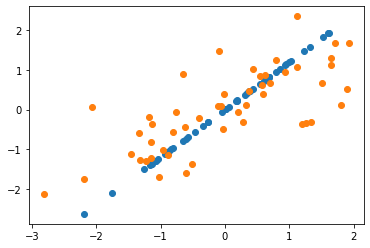

In [143]:
#可视化
x1=np.array([[ 0.63915068,  0.76908153]])
print(x1.shape)
view1=np.dot(finalData1,x1)
plt.scatter(view1[:,0],view1[:,1])
plt.scatter(X1[:,0],X1[:,1])

(1, 2)


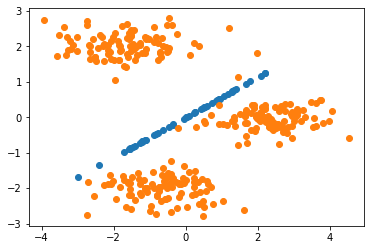

In [144]:
#可视化
x2=np.array([[ 0.8707906 ,  0.49165407]])
print(x2.shape)
view2=np.dot(finalData1,x2)
plt.scatter(view2[:,0],view2[:,1])
plt.scatter(X2[:,0],X2[:,1])

In [123]:
#选择最大的k个特征值对应的k个特征向量
index = np.argsort(-featValue3)
index
 
# 下面是从小到大
np.argsort(featValue3)

L=[]

for k in range(32,1023,12):
    selectVec = np.matrix(featVec3.T[index[:k]])
    selectVec
    finalData = X3 * selectVec.T 
    #计算误差
    reconData = (finalData * selectVec)
    #print(reconData.shape)
    errMat = X3 - reconData
    err1 = np.sum(np.array(errMat)**2) /5000

    err2 = np.sum(X3**2) / 5000

    eta = err1/err2
    print(k,eta)
    L.append([k,eta])

32 0.18094257061397753
44 0.1441788700077693
56 0.11857353323838313
68 0.09960453914035278
80 0.08513094503264373
92 0.07357624332709796
104 0.06423279510733285
116 0.05651188006839866
128 0.05003533480762459
140 0.044581664584604816
152 0.039843171519157755
164 0.03578118782191168
176 0.03223418322114436
188 0.02913565339942248
200 0.026381232053286234
212 0.02396457245659622
224 0.021807335431307133
236 0.019876490784190088
248 0.018153886246209398
260 0.016597349512527008
272 0.015190883107680414
284 0.01393184731333464
296 0.012786467821310004
308 0.011743642802069354
320 0.010795486619788661
332 0.009933391425093698
344 0.009146377847627628
356 0.008431508372816412
368 0.007777137442939858
380 0.007178810140476903
392 0.006630882255078266
404 0.0061272025749253564
416 0.0056619339398753495
428 0.005233676338397391
440 0.004837282859818063
452 0.004471782276589067
464 0.004135985237265253
476 0.003824386679045327
488 0.0035371197171306327
500 0.0032718249682002565
512 0.00302561705

Text(0, 0.5, 'eta')

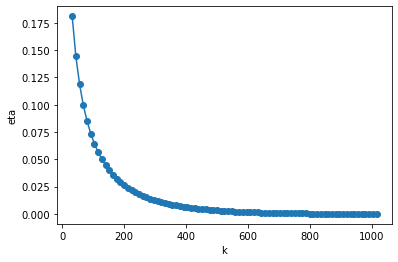

In [124]:
L=np.array(L)
plt.scatter(L[:,0],L[:,1])
plt.plot(L[:,0],L[:,1])
plt.xlabel('k')
plt.ylabel('eta')


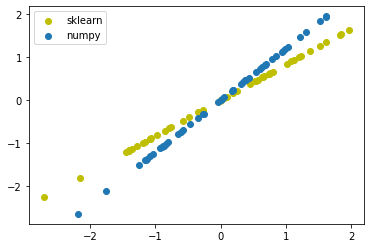

In [146]:
#sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
Xpca=pca.fit_transform(X1)
x_pca=np.dot(Xpca,pca.components_)
plt.scatter(x_pca[:,0],x_pca[:,1],c='y')
plt.scatter(view1[:,0],view1[:,1])
plt.legend(['sklearn', 'numpy'])
plt.show()